# Final Project Submission

Please fill out:
* Student name: Filip Szafranski
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


What type of films are currently doing the best at the box office?

In [ ]:
# Your code here - remember to use markdown cells for comments as well!

Problems and questions:
* check which genres are the most popular and profitable - which dbs to join?
* the most profitable movies and studios
* actors vs. profit

* what kind of data visulaization to use?

### AVAILABLE DATABASES ANALYSIS

Uploading libraries and available databases using pandas and read_csv method.

In [817]:
#Uploading libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
db_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [119]:
db_movie = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [120]:
db_movie_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding="latin-1")
db_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [204]:
db_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
db_title_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
db_name_basics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
db_titles_principals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [125]:
db_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [ ]:
db_movie_gross['year'] = pd.to_datetime(db_movie_gross['year']).dt.year

In [656]:
db_movie_profits_index = db_movie_profits.reset_index()

### CHECKING FOR MISSING VALUES

In [329]:
db_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [160]:
db_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [161]:
db_movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

### DATA CLEANUP AND PROCESSING

db_ratings analysis - grouping and sorting values

In [835]:
#movies with the best ratings based on number of votes above 10.000/movie

db_best_ratings = db_ratings[db_ratings['numvotes'] > 10000].sort_values(by=['averagerating', 'numvotes'], ascending=False)
db_best_ratings.head(15)

,tconst,averagerating,numvotes
9643,tt5813916,9.3,100568
10198,tt5354160,9.3,18470
49629,tt2170667,9.3,17308
36889,tt2592910,9.2,41560
60112,tt5275892,8.9,14946
63498,tt1375666,8.8,1841066
59785,tt4154796,8.8,441135
14415,tt3417422,8.8,24326
58930,tt7019842,8.8,10903
15820,tt7060344,8.8,10518


Processing databases

In [402]:
#Left join on tconst columns
df_joined_movie = db_best_ratings.join(db_title_basics.set_index('tconst'), how='inner', on='tconst')

In [403]:
# Exploding genres column comma separated values to find out mean rating for each genre
df_joined_movie_genres = joined_df.explode('genres')

In [700]:
#Creating new db with mean values
df_genres_summary = df_joined_movie_genres.groupby(by ='genres').mean().sort_values(by = 'averagerating', ascending=True)

#Adding new column with values count
df_genres_summary['item_count'] = df_joined_movie_genres.groupby('genres')['genres'].count()

#New database with genres rating and reset index
df_best_genres = df_genres_summary.reset_index()

In [701]:
#Narrowing down db to movie between 2000 - 2020
df_best_genres_2000 = df_best_genres[df_best_genres['start_year'] >= 2000]

In [731]:
#Adding new column with gross profit sum for each year
db_movie_profits['worldwide_gross_total'] = db_movie_budgets.groupby('release_date')['worldwide_gross'].sum()

In [739]:
#Adding new column with movies count for each year
db_movie_profits['count_total'] = db_movie_budgets.groupby('release_date')['movie'].count()

In [703]:
#Narrowing down db to movie between 2000 - 2020
df_joined_movie_genres_2000 = df_joined_movie_genres[df_joined_movie_genres['start_year'] >= 2000]

In [209]:
#Remove $ and , characters from certain columns
db_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']] = db_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']].applymap(lambda x: x[1:].replace(',', '')) 

In [210]:
#Convert columns data type from obj to numeric type - in64
db_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']] = db_movie_budgets[['domestic_gross', 'production_budget', 'worldwide_gross']].astype('int64')

In [211]:
#Creating a new column with domestic gross/budget ratio
db_movie_budgets['domestic gross/budget ratio'] = db_movie_budgets['domestic_gross']/db_movie_budgets['production_budget']

In [212]:
#Creating a new column with worldwide gross/budget ratio
db_movie_budgets['worldwide gross/budget ratio'] = db_movie_budgets['worldwide_gross']/db_movie_budgets['production_budget']

In [674]:
#Narrowing down db to movie between 2000 - 2020
db_movie_budgets_2000 = db_movie_budgets[db_movie_budgets['release_date'] >= 2000]

In [312]:
# Converting release_date from object to date format
db_movie_budgets['release_date'] = pd.to_datetime(db_movie_budgets['release_date'])
db_movie_budgets['release_date'] = db_movie_budgets['release_date'].dt.year

In [641]:
db_movie_profits = db_movie_budgets.groupby('release_date').mean().sort_values('release_date')
db_movie_profits.head(2)

,id,production_budget,domestic_gross,worldwide_gross,domestic gross/budget ratio,worldwide gross/budget ratio
release_date,,,,,,
1915,78.0,110000.0,10000000.0,11000000.0,90.909091,100.0
1916,19.5,292953.5,4000000.0,4000000.0,20.000000,20.0


In [ ]:
db_viz_gross = db_movie_gross.sort_values(by = 'domestic_gross', ascending=False).head(15)

### DATA VISUALIZATION

In [816]:
%matplotlib inline
plot_style = 'fivethirtyeight'
time_range = (2000,2021)

In [500]:
db_viz_gross_studio = db_movie_gross[['studio', 'domestic_gross']].groupby('studio').sum().reset_index().sort_values(by = 'domestic_gross', ascending=False).head(15)

In [677]:
db_movie_roi = db_movie_budgets_2000.sort_values(by = 'worldwide gross/budget ratio', ascending=False).head(15)

In [ ]:
db_viz_gross_studio_2000 = db_movie_gross[['studio', 'domestic_gross']].groupby('studio').sum().reset_index().sort_values(by = 'domestic_gross', ascending=False).head(15)

In [ ]:
df_best_genres_2000 = df_best_genres_2000.replace('News', 'Documentary')

### MARKET SIZE AND GROSS PROFIT BY YEAR
Data analysis for 1920 - 2020

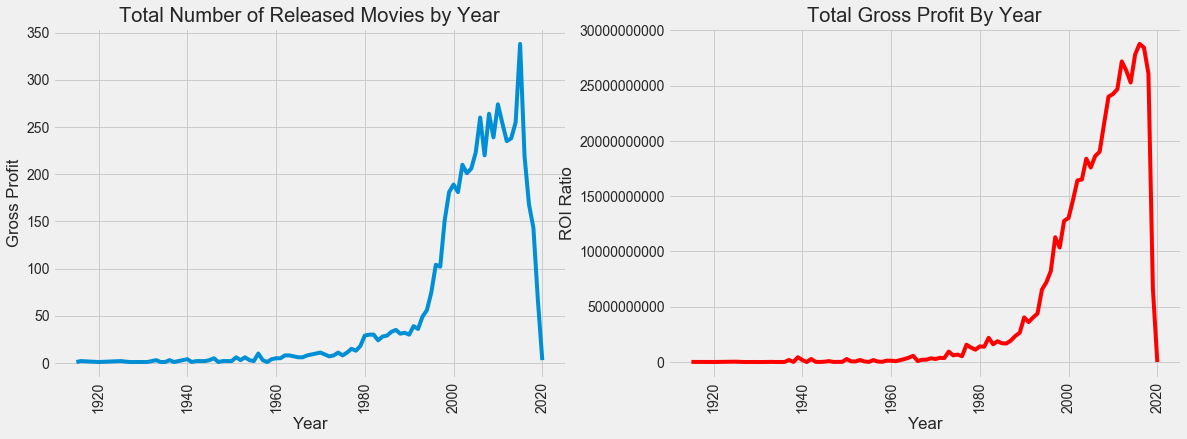

In [852]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    ax1.plot(db_movie_profits['count_total'])

    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('Gross Profit', rotation = 'vertical')
    ax1.set_xlabel('Year')
    ax1.set_title('Total Number of Released Movies by Year')
    ax1.set_xlim()
    
#     ax2=ax1.twinx()

    ax2.plot(db_movie_profits['worldwide_gross_total'], color = 'red')
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('Year')
    ax2.set_ylabel('ROI Ratio', rotation = 'vertical')
    ax2.set_title('Total Gross Profit By Year')
    ax2.set_xlim()
    plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0))
    
    plt.savefig('viz/global trends.png', bbox_inches="tight")
    

### ROI, BUDGET AND GROSS PROFIT

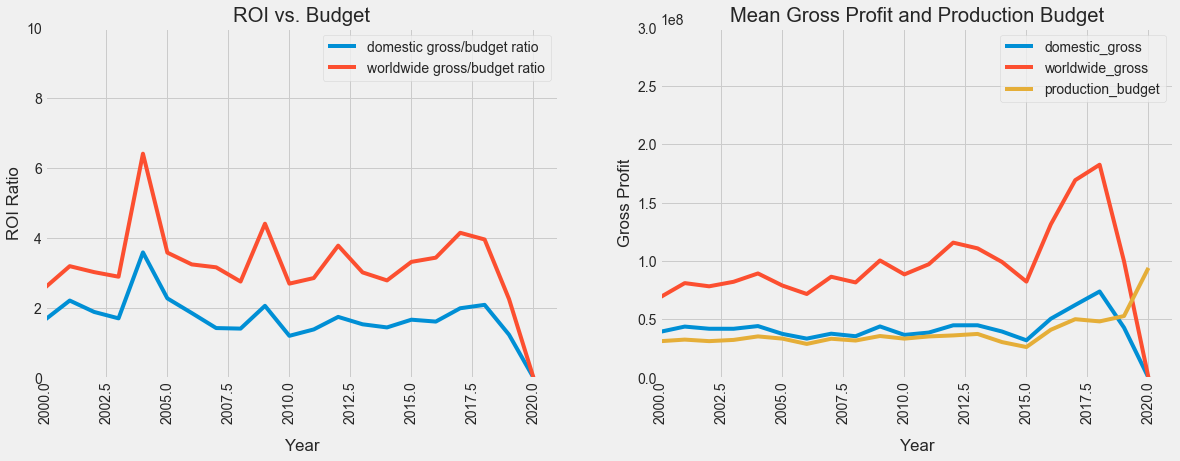

In [854]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.plot(db_movie_profits[['domestic gross/budget ratio','worldwide gross/budget ratio']])

    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('ROI Ratio', rotation = 'vertical')
    ax1.set_xlabel('Year', labelpad=15)
    ax1.set_title('ROI vs. Budget')
    ax1.legend(['domestic gross/budget ratio','worldwide gross/budget ratio'])
    ax1.set_xlim(time_range)
    ax1.set_ylim(0,10)

    ax2.plot(db_movie_profits[['domestic_gross','worldwide_gross','production_budget']])
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('Year', labelpad=15)
    ax2.set_ylabel('Gross Profit', rotation = 'vertical')
    ax2.set_title('15 most profitable studios - domestic market')
    ax2.legend(['domestic_gross','worldwide_gross','production_budget'])
    ax2.set_title('Mean Gross Profit and Production Budget')
    ax2.set_xlim(time_range), ax2.set_ylim(0,3e8)
    
    plt.savefig('viz/STUDIOS AND MOVIES PROFITABILITY 2000 - 2020.png', bbox_inches="tight")

### 15 MOST PROFITABLE STUDIOS AND MOVIES 1920 - 2020

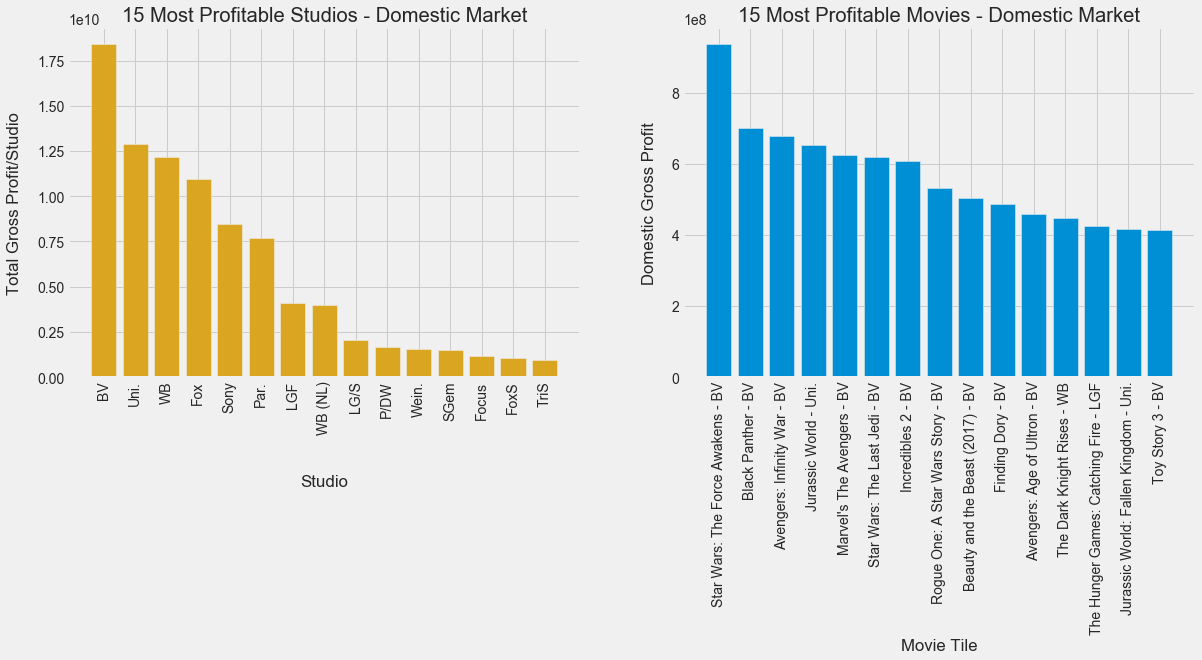

In [824]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(122)
    ax2 = fig.add_subplot(121)
    ax1.bar('title_studio', 'domestic_gross', data = db_viz_gross)

    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('Domestic Gross Profit', rotation = 'vertical', labelpad=15)
    ax1.set_xlabel('Movie Tile')
    ax1.set_title('15 Most Profitable Movies - Domestic Market')

    ax2.bar(db_viz_gross_studio['studio'], db_viz_gross_studio['domestic_gross'], color = 'goldenrod')
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('Studio', labelpad=40)
    ax2.set_ylabel('Total Gross Profit/Studio', rotation = 'vertical', labelpad=15)
    ax2.set_title('15 Most Profitable Studios - Domestic Market')
    
    plt.savefig('viz/15 MOST PROFITABLE STUDIOS AND MOVIES 1920 - 2020.png', bbox_inches="tight")

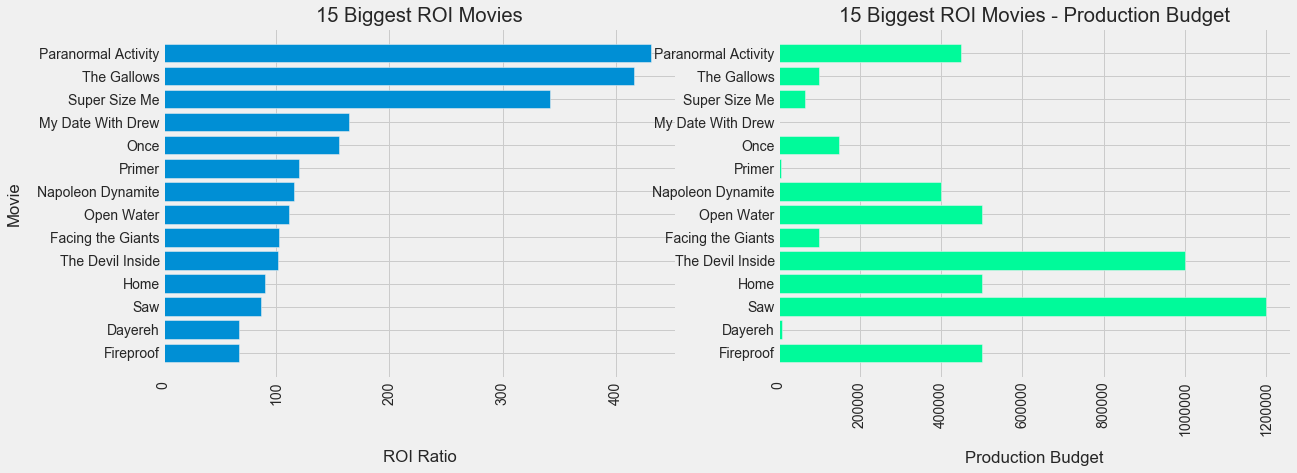

In [825]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.barh('movie', 'worldwide gross/budget ratio', data = db_movie_roi)

    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('Movie', rotation = 'vertical', labelpad=15)
    ax1.set_xlabel('ROI Ratio', labelpad=45)
    ax1.set_title('15 Biggest ROI Movies')
    ax1.invert_yaxis()

    ax2.barh('movie', 'production_budget', data = db_movie_roi, color = 'mediumspringgreen')
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('Production Budget', labelpad=15)
#     ax2.set_yticklabels([])
#     ax2.set_ylabel('Movie', rotation = 'vertical', labelpad=15)
    ax2.set_title('15 Biggest ROI Movies - Production Budget')
    ax2.invert_yaxis()
    
    plt.savefig('viz/MOst Profitable movies.png', bbox_inches="tight")

In [727]:
#Dropping 'My Big Fat Greek Wedding' due to incorrect data
db_movie_roi = db_movie_roi.drop(index = db_movie_roi[db_movie_roi.movie == 'My Big Fat Greek Wedding'].index)

### GENRES ANALYSIS

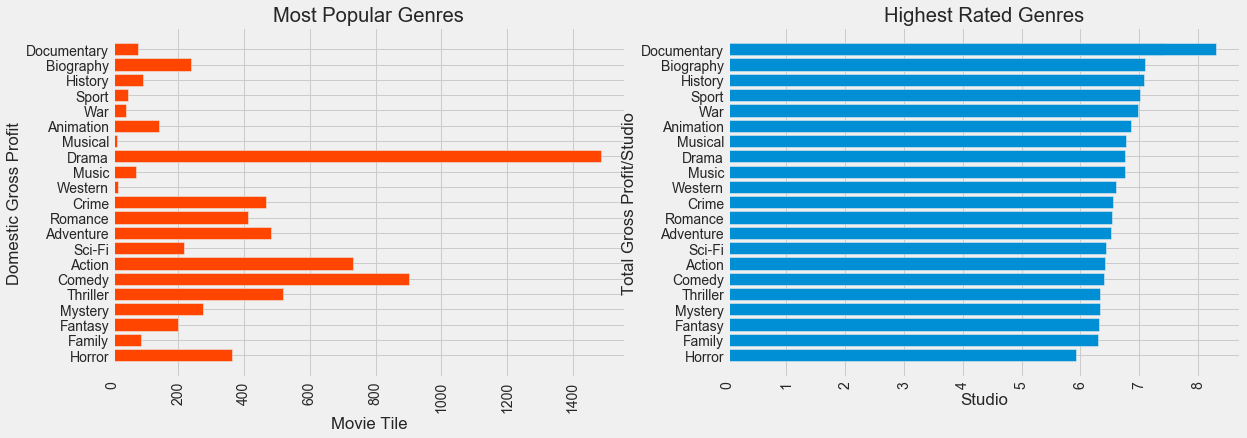

In [815]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.barh('genres', 'item_count', data = df_best_genres_2000, color = 'orangered')

    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('Domestic Gross Profit', rotation = 'vertical')
    ax1.set_xlabel('Movie Tile')
    ax1.set_title('Most Popular Genres')

    ax2.barh(df_best_genres_2000['genres'], df_best_genres_2000['averagerating'])
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('Studio')
    ax2.set_ylabel('Total Gross Profit/Studio', rotation = 'vertical')
    ax2.set_title('Highest Rated Genres')
    
    plt.savefig('viz/Genres.png', bbox_inches="tight")

### BUDGET SIZE ANALYSIS

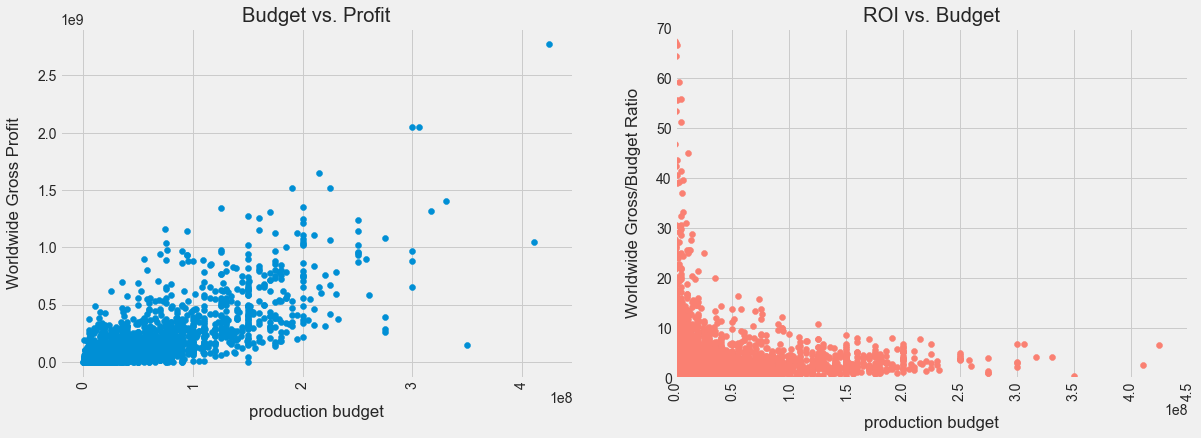

In [834]:
with plt.style.context('fivethirtyeight'):
    fig = plt.figure(figsize=(18,6))

    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.scatter('production_budget','worldwide_gross', data = db_movie_budgets_2000)

    #scatter plot - budget vs gross
    ax1.tick_params('x', labelrotation=90)
    ax1.set_ylabel('Worldwide Gross Profit', rotation = 'vertical', labelpad=15)
    ax1.set_xlabel('production budget', labelpad=15)
    ax1.set_title('Budget vs. Profit')

    #the biggest ROI can be achieved with a smaller budget
    ax2.scatter('production_budget','worldwide gross/budget ratio', data = db_movie_budgets_2000, color = 'salmon')
    ax2.tick_params('x', labelrotation=90)
    ax2.set_xlabel('production budget', labelpad=15)
    ax2.set_ylabel('Worldwide Gross/Budget Ratio', rotation = 'vertical', labelpad=15)
    ax2.set_title('ROI vs. Budget')
    ax2.set_xlim(0, 4.5e8), ax2.set_ylim(0,7e1)
    
    plt.savefig('viz/Budget Analysis.png', bbox_inches="tight")
    
